## Inference Notebook
### Libraries

In [35]:
import torch
import sys
import pandas as pd
# import torchvision
import numpy as np
import pandas as pd
%matplotlib inline
import skimage.io as io
import matplotlib.pyplot as plt
import csv
import random
import torch.nn as nn
from nltk.translate.bleu_score import corpus_bleu
from tqdm.auto import tqdm
from loader import FlickrDataset,preprocessing_transforms,get_data_loader,denormalize,Padding
from vocab import Vocabulary
from inference import beam_search
from csv import DictWriter
from model import EncoderCNN,DecoderRNN
from model_utils import train, validate,clip_gradient,save_checkpoint,evaluate_test
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pack_padded_sequence
import time
import math
import sys
from torch.utils.data import DataLoader
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [24]:
# del sys.modules['inference']

In [25]:
vocab = Vocabulary(vocab_file = './vocab10000.txt',vocab_size = 10000)
vocab.load_vocab()

In [26]:
test = pd.read_csv('./flickr30k_processed/test.csv')

### Inference on Model I and II

In [27]:
checkpoint = torch.load('./image_captioning_best.pth',map_location=device)
encoder_1 = checkpoint['encoder'].to(device)
decoder_1 = checkpoint['decoder'].to(device)
alpha_c = 1

In [28]:
checkpoint = torch.load('./image_captioning_best_2.pth',map_location=device)
encoder_2 = checkpoint['encoder'].to(device)
decoder_2 = checkpoint['decoder'].to(device)

In [31]:
image_list = test['image'].unique().tolist()

In [36]:
random.seed(1234)


In [38]:
def show_inference(image_list):
    image = random.choice(image_list)
    print('Model I')
    print(beam_search(encoder_1,decoder_1,image_path=f'./flickr30k_processed/{image}',vocab = vocab,vocab_size=10000,device=device,print_image=False))
    print('Model II')
    print(beam_search(encoder_2,decoder_2,image_path=f'./flickr30k_processed/{image}',vocab = vocab,vocab_size=10000,device=device))


Model I
a man and a woman are walking past a red building
Model II
a man in a red shirt is pushing a dog on a leash


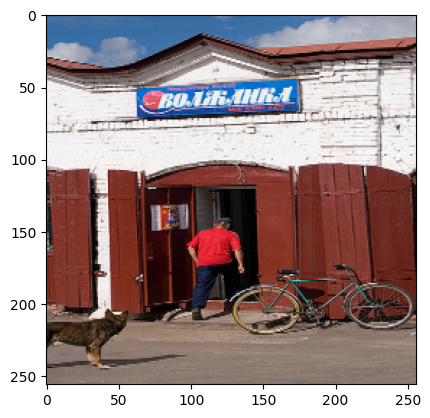

In [39]:
show_inference(image_list)

Model I
a man is walking down a sidewalk
Model II
a man in a white shirt is walking down a city street


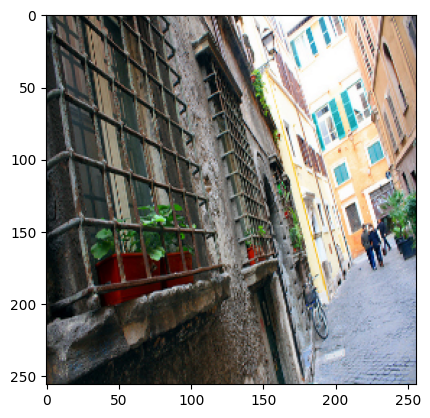

In [40]:
show_inference(image_list)

Model I
a group of people are walking down a path
Model II
a group of people are walking down a road


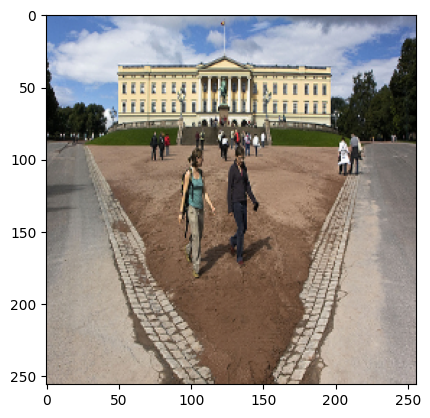

In [41]:
show_inference(image_list)

Model I
a person in a red jacket is climbing up a mountain
Model II
a man in a red shirt is snowboarding down a mountain


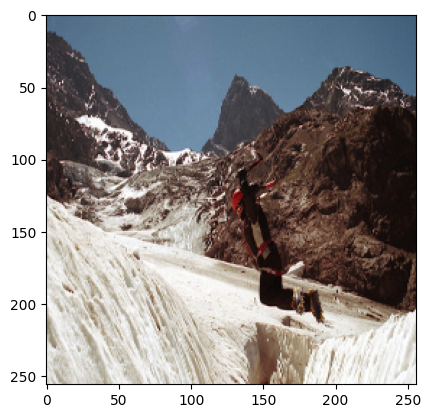

In [42]:
show_inference(image_list)

Model I
a man and a child are looking at the water
Model II
a man in a red shirt is standing on the edge of a body of water


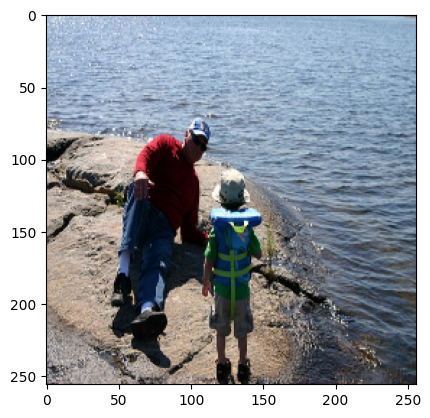

In [43]:
show_inference(image_list)

Model I
a woman in a white shirt is looking at her cellphone
Model II
a woman in a white shirt is taking a picture


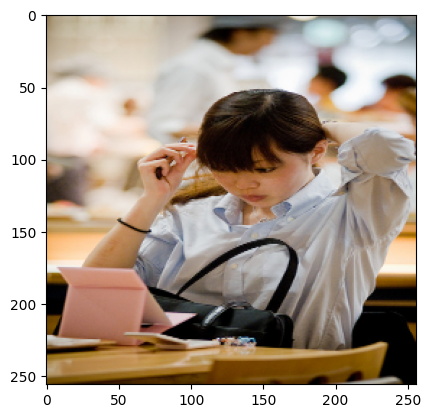

In [44]:
show_inference(image_list)

Model I
a man in a white shirt is sleeping on a couch
Model II
a man in a white shirt is sitting on a couch


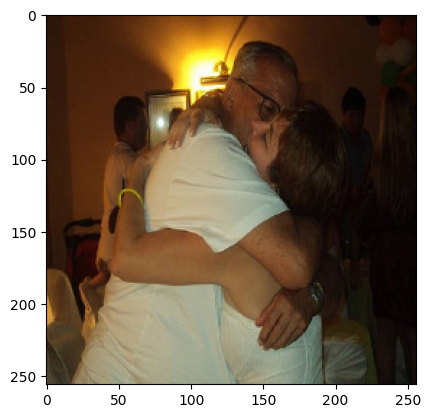

In [45]:
show_inference(image_list)

Model I
a man in a white shirt is cooking on a grill
Model II
a man and a woman are preparing food


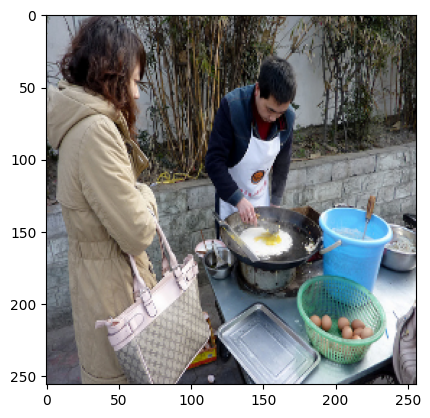

In [47]:
show_inference(image_list)

Model I
a woman in a white shirt is writing on a piece of paper
Model II
a woman in a green shirt is writing on a piece of paper


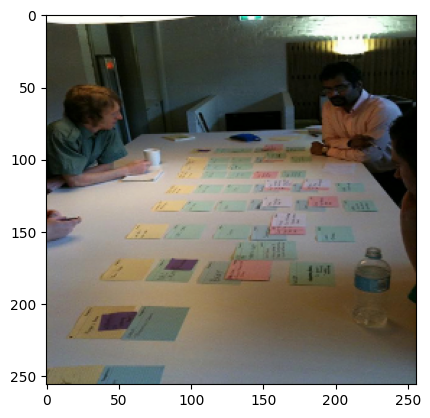

In [48]:
show_inference(image_list)

Model I
a man in a red uniform is standing next to a body of water
Model II
a man in a red uniform is holding a flag


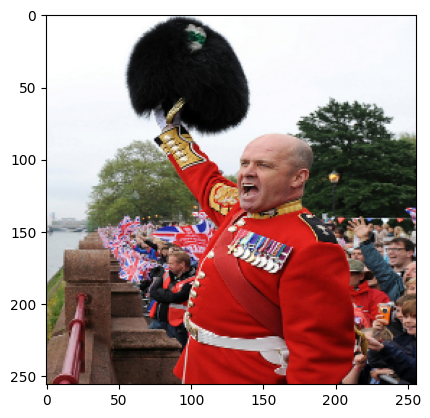

In [49]:
show_inference(image_list)

Model I
a girl in a pink shirt brushes her teeth
Model II
a woman in a pink shirt is eating


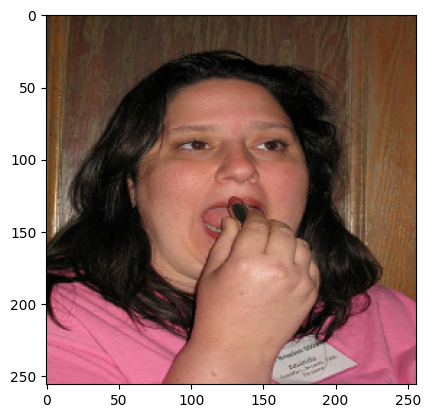

In [50]:
show_inference(image_list)

Model I
a large group of people are walking down a city street
Model II
a crowd of people in a city


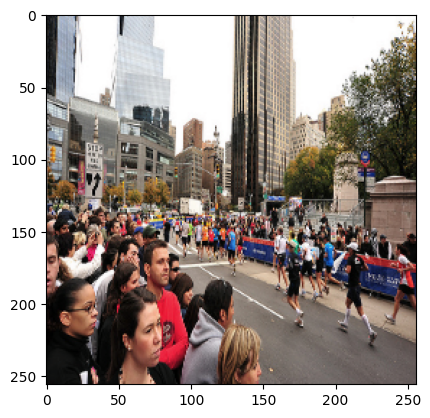

In [51]:
show_inference(image_list)

Model I
a woman in a blue dress is playing tennis
Model II
a girl in a blue shirt is playing tennis


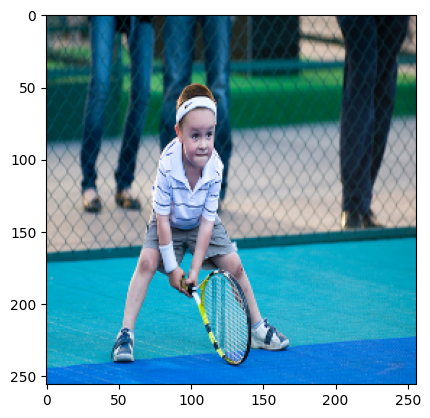

In [52]:
show_inference(image_list)

Model I
a woman in a green shirt is holding a flag
Model II
a young asian man and a woman in a parade


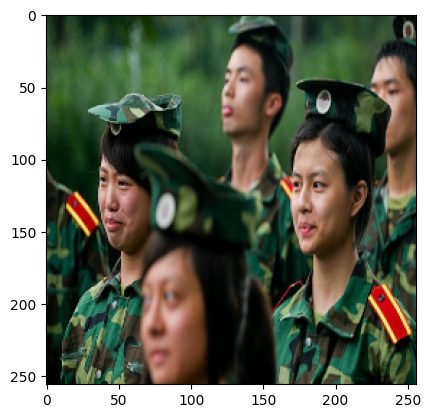

In [53]:
show_inference(image_list)

Model I
a man in a white shirt is eating a hotdog
Model II
a man in a blue shirt is eating a sandwich


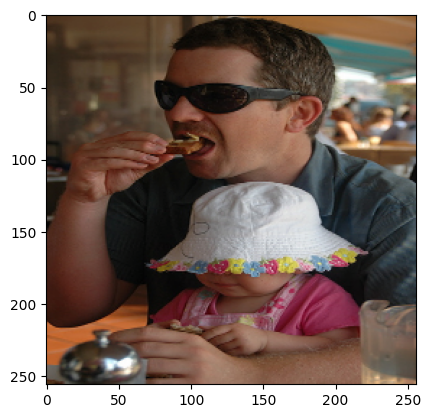

In [54]:
show_inference(image_list)

Model I
a man is driving a jeep in the woods
Model II
a man is driving a tractor


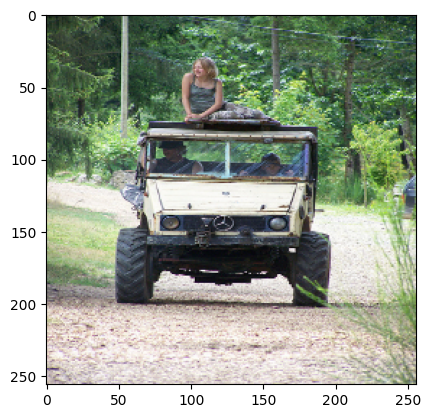

In [55]:
show_inference(image_list)

Model I
a man in a blue and white striped shirt is standing in front of a
Model II
a woman in a white shirt and blue jeans is standing in front of a hut


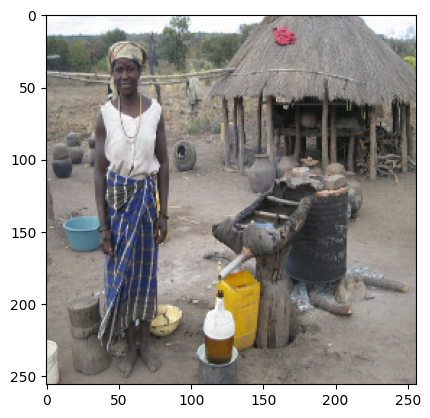

In [56]:
show_inference(image_list)

Model I
a man and a woman are dancing
Model II
two young boys are playing in the park


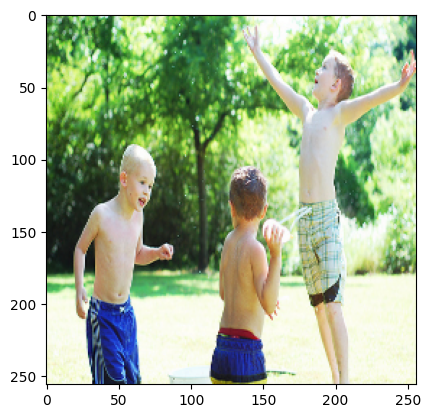

In [57]:
show_inference(image_list)

Model I
a woman in a black shirt and jeans is dancing with a man in a black shirt
Model II
a woman in a white shirt and black shorts is standing in front of a store


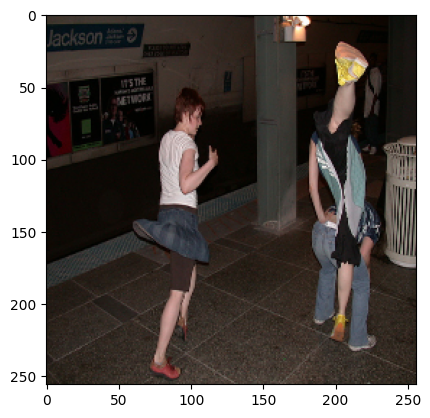

In [58]:
show_inference(image_list)